In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/just-the-basics-the-after-party/train_labels.csv
/kaggle/input/just-the-basics-the-after-party/train.csv
/kaggle/input/just-the-basics-the-after-party/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('/kaggle/input/just-the-basics-the-after-party/train.csv')
y=pd.read_csv('/kaggle/input/just-the-basics-the-after-party/train_labels.csv')
test=pd.read_csv('/kaggle/input/just-the-basics-the-after-party/test.csv')
y
# train

0
0    1
1    0
2    0
3    1
4    0
..  ..
594  1
595  0
596  1
597  0
598  0

[599 rows x 1 columns]

# Information about Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 100 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0.097094   584 non-null    float64
 1   1.1133     589 non-null    float64
 2   45.038     579 non-null    float64
 3   0.88184    579 non-null    float64
 4   0.087009   574 non-null    float64
 5   1.041      583 non-null    float64
 6   1.5486     586 non-null    float64
 7   3.498      582 non-null    float64
 8   1.8578     580 non-null    float64
 9   0.0096729  580 non-null    float64
 10  4.5162     586 non-null    float64
 11  2.4716     583 non-null    float64
 12  0.07963    585 non-null    float64
 13  4.0896     576 non-null    float64
 14  1.6902     572 non-null    float64
 15  0.91547    583 non-null    float64
 16  0.091189   577 non-null    float64
 17  1.4153     587 non-null    float64
 18  3.1192     582 non-null    float64
 19  0.0060186  578 non-null    float64
 20  0.014375 

**there are NULL Values**

# Unique Values in EACH Feature

In [5]:
train.nunique()

0.097094    583
1.1133      586
45.038      563
0.88184     577
0.087009    573
           ... 
0.0845      581
2.4517      583
3.3373      579
0.065201    580
0.091158    572
Length: 100, dtype: int64

# Considering Infinite to NAN throughout the Notebook

In [6]:
pd.set_option('mode.use_inf_as_na', True)

# Columns having Null Values

In [7]:
null_train=train.columns[train.isnull().any()]
null_train

Index(['0.097094', '1.1133', '45.038', '0.88184', '0.087009', '1.041',
       '1.5486', '3.498', '1.8578', '0.0096729', '4.5162', '2.4716', '0.07963',
       '4.0896', '1.6902', '0.91547', '0.091189', '1.4153', '3.1192',
       '0.0060186', '0.014375', '0.037306', '0.61815', '0.055585', '0.01074',
       '3.0279', '1.8636', '0.014393', '0.21286', '2.5653', 'NaN', '0.028234',
       '0.040381', '0.065676', '0.79874', '6.0681', '1.3486', '0.78914',
       '0.48925', '0.044965', '3.6954', '1.6518', 'NaN.1', '2.0031', '1.6097',
       '4.2557', '0.016952', '1.6888', '0.070763', '0.028963', '3.469',
       '0.04013', '0.651', '0.076915', '0.82981', '2.6242', '0.0077223',
       '1.9591', '0.091773', '0.0014508', '0.062135', '0.097433', '0.081459',
       '0.089605', '0.019517', '0.39503', '2.201', '3.6572', '0.022237',
       '0.042535', '4.525', '0.16949', '0.67231', '0.052349', '4.6379',
       '0.012962', '0.019132', '4.5504', '0.005637', '0.26957', '3.5743',
       '0.040547', '3.4724',

In [8]:
null_test=test.columns[test.isnull().any()]
null_test

Index(['0.1312', '4.2014', '1428.1', '2.9094', 'NaN', '2.665', '4.5456',
       '0.62337', '4.7625', '4.2873', '4.1634', '2.3083', '0.22198', '1.2972',
       '1.4427', '1.6298', '0.092008', '4.4482', '1.0105', '0.005566',
       '0.099927', '0.077645', '2.5984', '0.047768', '0.4131', '2.9789',
       '2.3798', '0.081951', '0.122', '1.5209', '0.10429', '0.022452',
       '0.20647', '0.079903', '4.0539', '494.03', '1.7486', '1.9708',
       '0.39757', '0.57758', '2.1831', '2.2359', '0.061918', '0.34809',
       '6.8613', '3.5723', '0.01377', '3.6286', '0.62019', '0.095503',
       '0.15216', '0.028909', '0.0048656', '0.21235', '0.2052', '3.8748',
       '0.01444', '2.2396', '0.071275', '0.016755', '0.4787', '0.041618',
       '0.014462', '0.48456', '0.012416', '3.1248', '2.2838', '3.476',
       '0.093046', '0.00014507', '3.4722', '4.4924', '0.29114', '0.089994',
       '1.0212', '0.060472', '0.011929', '1.2945', '0.092921', '0.31931',
       '2.4446', '1.7247', '3.0136', '0.16714', '0.

# Impute Missing Values

Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors,interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

In [9]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

train[null_train] = imp.fit_transform(train[null_train])

train.isnull().sum().sum()

0

In [10]:
test[null_test] = imp.fit_transform(test[null_test])
test.isnull().sum().sum()

0

**Bye-Bye NULL Values**

# Boxplot

Vizualize the Distribution of Features

In [11]:
import plotly.express as px
for col in train.columns:
    fig = px.box(train, y=train[col], color=y['0'],points="all")
    fig.show()

**Boxplot showed us that there are SOME OUTLIERS, that needs to be removed**

# Removing Outliers

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

In [12]:
# Using Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.3)

out = iso.fit_predict(train)

# select all rows that are not outliers
train[out != -1]
train

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



0.097094   1.1133     45.038  0.88184  0.087009    1.041    1.5486  \
0    0.050086  0.11158    94.0800  1.76500  0.089417  4.80470  0.267420   
1    0.088447  2.36340     5.0580  0.14436  0.064547  2.44400  4.254500   
2    0.772540  0.59469     6.0078  0.97515  0.015987  0.52884  1.488400   
3    0.382410  4.81090  1955.1000  0.46050  0.024453  2.02980  3.740300   
4    0.081316  4.84150     4.0507  2.48320  0.058990  2.37940  1.612700   
..        ...      ...        ...      ...       ...      ...       ...   
594  0.083012  4.44000  1140.1000  5.04650  0.069693  4.32170  2.652700   
595  0.523780  3.32790   122.0500  3.54630  1.010900  1.72230  3.131200   
596  0.995510  1.60620   464.0900  3.58910  0.091039  1.62010  3.688400   
597  1.208000  2.10000    24.0110  2.92140  0.055663  0.78477  1.288900   
598  0.083476  2.86980    37.0740  3.08970  0.086909  4.91600  0.087911   

       3.498   1.8578  0.0096729  ...  0.076209   3.6654  0.061607  0.0031605  \
0    1.48770  0.56473   0.035123  ...  0.054712  4.16870  0.075432   0.010869   
1    0.36506  1.86090   0.009759  ...  0.017203  4.56130  0.046505   0.027065   
2    3.96100  4.80630   0.048617  ...  0.022891  0.12832  0.065028   0.036862   
3    4.22810  2.42920   0.156830  ...  0.032051  4.37010  1.001100   0.065750   
4    2.04220  1.65710   0.039377  ...  0.018918  2.68040  0.076524   0.082756   
..       ...      ...        ...  ...       ...      ...       ...        ...   
594  4.80340  4.91870   0.088879  ...  0.054703  3.50690  0.518980   0.047767   
595  3.75900  3.61270   0.061250  ...  0.351960  1.55980  0.023365   1.084000   
596  1.84550  0.41606   0.548030  ...  0.114580  3.32090  0.019906   0.057709   
597  3.18080  4.77850   0.050453  ...  0.011022  2.48810  0.061171   0.070312   
598  2.55460  2.13250   0.069508  ...  0.615660  0.12656  0.085419   0.002887   

     0.036038    0.0845   2.4517  3.3373  0.065201  0.091158  
0    0.063972  0.079892  1.97950  3.5064  0.072132  0.091950  
1    0.084066  0.064829  3.30870  2.9969  0.064328  0.036793  
2    0.010010  0.020709  2.52370  2.1711  0.080865  0.081553  
3    0.043547  0.629430  4.62620  3.1947  0.000553  0.187180  
4    0.041953  0.018092  3.30410  0.1922  0.032600  0.050172  
..        ...       ...      ...     ...       ...       ...  
594  0.061994  0.256460  3.57210  4.7692  0.056299  0.162660  
595  0.072553  0.049359  3.46930  3.1465  0.031458  0.019107  
596  0.097567  0.073208  0.62583  4.6044  0.071155  0.053476  
597  0.000338  0.043862  0.58203  4.5994  0.045182  0.031991  
598  0.007303  0.009501  4.80320  1.7190  0.054735  0.035035  

[599 rows x 100 columns]

In [13]:
out = iso.fit_predict(test)

# select all rows that are not outliers
test[out != -1]
test

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



0.1312   4.2014     1428.1   2.9094       NaN    2.665   4.5456  \
0     0.083796  3.92690    80.0590  1.87800  0.064623  4.14680  3.72740   
1     0.067591  3.01070    25.0300  1.26430  3.031100  3.09690  1.78210   
2     0.064830  0.11960     5.0957  1.93660  0.028638  1.21470  0.34675   
3     0.345720  1.42610    44.0410  2.76560  0.095754  1.70890  3.94490   
4     0.080434  0.88394    30.0330  4.13900  0.021173  4.77530  2.83760   
...        ...      ...        ...      ...       ...      ...      ...   
3994  0.036445  3.86630   530.0100  3.19080  0.043165  0.21049  1.61840   
3995  0.080715  3.06090   145.0900  1.74360  0.051496  4.04320  4.01490   
3996  0.260410  4.01400  1161.1000  0.58602  0.826840  0.31077  1.59060   
3997  0.048965  0.75552   474.0100  2.68170  0.050257  2.62300  4.58700   
3998  0.442450  4.21940  1123.0000  2.52890  0.207100  2.36520  3.60050   

      0.62337   4.7625    4.2873  ...  0.099056  2.0518  0.0089453  0.087689  \
0     0.10988  1.90250  0.093267  ...  0.046586  2.9683   0.079120  0.079630   
1     1.43460  1.88170  0.002060  ...  0.099853  1.2933   0.015907  0.061634   
2     1.11880  0.99529  0.060067  ...  0.095575  4.4767   0.010862  0.067340   
3     0.11820  1.50260  0.030124  ...  0.210120  1.2719   0.028321  0.086113   
4     3.56910  4.84780  0.034984  ...  0.052596  0.7264   0.085290  0.084134   
...       ...      ...       ...  ...       ...     ...        ...       ...   
3994  2.67970  4.23950  0.075493  ...  0.177070  3.7940   0.021300  0.082044   
3995  3.08130  2.81060  0.022633  ...  0.029050  1.5209   0.023879  0.084377   
3996  3.87060  3.56340  0.090322  ...  0.226540  4.0418   0.070592  0.014543   
3997  1.96530  1.20000  0.004702  ...  0.033444  2.2482   0.090492  0.013366   
3998  0.90793  3.31500  0.058202  ...  0.019618  1.7651   0.109600  0.090383   

      0.070505  0.029144   1.1697  0.50162  0.045636   0.14237  
0     0.026689  0.066626  1.94460   2.2163  0.099828  0.088621  
1     0.079210  0.022622  2.01960   3.4430  0.069516  0.025426  
2     0.054280  0.003331  0.95697   3.6970  0.049861  0.073140  
3     0.007885  0.528200  1.87460   2.1488  0.030729  0.020493  
4     0.015853  0.084836  4.45840   3.9588  0.091619  0.007432  
...        ...       ...      ...      ...       ...       ...  
3994  0.030834  0.068292  3.56710   2.9700  0.093883  0.056370  
3995  0.005575  0.119900  1.37370   1.3530  0.068311  0.005162  
3996  0.014508  0.018798  1.90200   4.9176  0.115350  0.018841  
3997  0.030227  0.063834  3.21960   3.7884  0.016478  0.449020  
3998  0.027032  0.059189  0.58813   2.5317  0.253890  0.076536  

[3999 rows x 100 columns]

# 

# Jointplot

In [14]:
# import plotly.express as px
# for col in train.columns:
#     fig = px.scatter(train, x=train[col], y=y['0'], marginal_y="rug", marginal_x="histogram")
#     fig.show()

# 2D Histogram
To see relation between EACH Feature and Target Variable

In [15]:
import plotly.express as px
for col in train.columns:
    fig = px.density_heatmap(train, x=train[col],y=y['0'], marginal_x="histogram", marginal_y="histogram")
    fig.show()

# Heatmap
Checks the Correlation among ALL Features

In [16]:
import plotly.express as px
fig = px.imshow(train.corr(), text_auto=True,aspect="auto")
fig.show()

# Train Test Split
It splits the train data into 4 parts, X_train, X_test, y_train, y_test.

X_train, y_train first used to train the algorithm.
X_test is used in that trained algorithms to predict outcomes.
Once we get the outcomes, we compare it with y_test

In [17]:
X=train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train
# X_test
# y_train
# y_test

0.097094  1.1133    45.038  0.88184  0.087009    1.041  1.5486    3.498  \
583  0.680210  2.0763   119.000  4.60180  0.044945  2.17570  2.0234  1.50210   
384  0.088832  2.1181    24.019  2.23700  0.026152  4.49630  2.0045  1.65260   
1    0.088447  2.3634     5.058  0.14436  0.064547  2.44400  4.2545  0.36506   
185  0.051749  3.6493    18.028  4.56250  0.008020  2.79270  3.4471  2.98020   
450  1.297800  4.4359   243.050  0.67911  0.057612  3.11910  4.4840  2.23780   
..        ...     ...       ...      ...       ...      ...     ...      ...   
203  0.016945  2.6118    55.009  3.17020  0.007852  0.29735  4.8689  4.09090   
387  0.572850  3.0042   344.060  3.43070  0.069954  0.11337  2.0634  3.79720   
57   1.178000  0.4011    20.022  2.26900  0.005497  0.78545  2.3684  1.66050   
428  0.002919  2.0763    10.042  0.96353  0.040954  4.15330  1.1704  0.07367   
303  0.178160  4.6492  1617.100  1.86440  0.385980  2.23540  4.9147  2.95330   

      1.8578  0.0096729  ...  0.076209  3.6654  0.061607  0.0031605  0.036038  \
583  1.16980   0.043398  ...  0.020617  1.0004  0.008396   0.013985  0.084148   
384  0.26015   0.052527  ...  0.030194  3.1427  0.011834   0.059951  0.045030   
1    1.86090   0.009759  ...  0.017203  4.5613  0.046505   0.027065  0.084066   
185  0.31785   0.026495  ...  0.011101  3.1146  0.082664   0.063218  1.674100   
450  0.94088   1.017100  ...  0.042350  1.1565  0.998820   0.018545  0.039332   
..       ...        ...  ...       ...     ...       ...        ...       ...   
203  3.36320   0.027302  ...  0.143090  1.3837  0.026560   0.034754  0.000338   
387  1.18170   2.201300  ...  0.081717  1.2777  1.397600   0.033447  0.006266   
57   4.94160   0.024010  ...  0.099393  1.9275  0.049919   0.038241  0.004118   
428  2.51280   0.096527  ...  0.091370  3.7478  0.017445   0.068663  0.064692   
303  4.87050   0.094628  ...  0.214800  1.1573  0.035208   0.073952  0.018850   

       0.0845   2.4517   3.3373  0.065201  0.091158  
583  0.014767  2.83510  1.76480  0.098064  0.015055  
384  0.085689  3.24700  2.07770  0.086997  0.018236  
1    0.064829  3.30870  2.99690  0.064328  0.036793  
185  0.055106  0.97105  0.19003  0.034539  0.039032  
450  0.019133  4.37270  2.35590  0.084252  0.982730  
..        ...      ...      ...       ...       ...  
203  0.009978  1.22650  1.56410  0.056189  0.014183  
387  0.005927  3.28970  3.68350  0.000553  0.278880  
57   0.024790  2.87450  1.23760  0.019398  0.061154  
428  0.019169  1.14220  1.62000  0.044968  0.024365  
303  0.038419  0.85919  4.48850  0.038945  0.071259  

[449 rows x 100 columns]

# Train & Fit the XGBoost Model
To know more about XGB HyperParameters check ;- https://www.kaggle.com/code/pythonkumar/xgboost-hyperparameters-excellent-plots-acc-91?scriptVersionId=94478268&cellId=70

In [18]:
from xgboost import XGBClassifier
model = XGBClassifier(
    booster='gbtree', 
    objective='binary:logistic', 
    eval_metric='logloss',
    n_estimators=1000,
    max_depth=15,
    min_split_loss=0.1,
    base_score=0.5,
    learning_rate=0.08,
    reg_alpha=0.5,
    reg_lambda=0.5,
    gamma=0.2)

model.fit(X_train, y_train)

model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'gamma': 0.2,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.08,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 15,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'min_split_loss': 0.1}

# Predicting from XGB Model

In [19]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

# Scoring - Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cm

array([[79,  3],
       [11, 57]])

# Scoring - F1 Score

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.890625

# Feature Importance

In [22]:
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01533
Feature: 1, Score: 0.00888
Feature: 2, Score: 0.00545
Feature: 3, Score: 0.00694
Feature: 4, Score: 0.00813
Feature: 5, Score: 0.00248
Feature: 6, Score: 0.00416
Feature: 7, Score: 0.00444
Feature: 8, Score: 0.00429
Feature: 9, Score: 0.00544
Feature: 10, Score: 0.00317
Feature: 11, Score: 0.00170
Feature: 12, Score: 0.02133
Feature: 13, Score: 0.00739
Feature: 14, Score: 0.01104
Feature: 15, Score: 0.00566
Feature: 16, Score: 0.03486
Feature: 17, Score: 0.00825
Feature: 18, Score: 0.00436
Feature: 19, Score: 0.01043
Feature: 20, Score: 0.00791
Feature: 21, Score: 0.00107
Feature: 22, Score: 0.01019
Feature: 23, Score: 0.00519
Feature: 24, Score: 0.01471
Feature: 25, Score: 0.00756
Feature: 26, Score: 0.00513
Feature: 27, Score: 0.00657
Feature: 28, Score: 0.00237
Feature: 29, Score: 0.00443
Feature: 30, Score: 0.02317
Feature: 31, Score: 0.01278
Feature: 32, Score: 0.00437
Feature: 33, Score: 0.00322
Feature: 34, Score: 0.00383
Feature: 35, Score: 0.03735
Fe

# Plotting Feature Importance

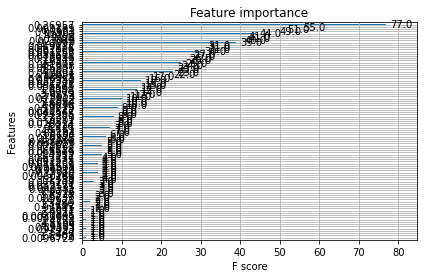

In [23]:
# plot
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

# Suggestions:-
* Kaggle - https://www.kaggle.com/pythonkumar
* GitHub - https://github.com/KumarPython​
* Twitter - https://twitter.com/KumarPython
* LinkedIn - https://www.linkedin.com/in/kumarpython/

# Submission

In [24]:
submission=pd.DataFrame({'Predictions': model.predict(test)})
submission
submission.to_csv('submission.csv', index=False)